In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
raw_df = pd.read_csv('Life Expectancy Data.csv')
df = raw_df.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [101]:
df.shape

(2938, 22)

In [102]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [103]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_').str.replace('-','_')


In [104]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [105]:
len(df['Country'].unique())

193

Data Imputing

In [106]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [107]:
df.BMI.mean()

38.32124655647373

In [108]:
df[df.BMI == 0]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling


In [109]:
# df.BMI.fillna(value=0,inplace=True)

In [110]:
BMI_lst = []
for country in df.Country.unique():
    temp_df = df[df.Country == country]
    
    for index, row in temp_df.iterrows():
        if row.BMI == 0 or row.BMI == np.nan:
            BMI_lst.append(temp_df.BMI.mean())
        else:
            BMI_lst.append(row.BMI)

In [87]:
BMI_lst

[19.1,
 18.6,
 18.1,
 17.6,
 17.2,
 16.7,
 16.2,
 15.7,
 15.2,
 14.7,
 14.2,
 13.8,
 13.4,
 13.0,
 12.6,
 12.2,
 58.0,
 57.2,
 56.5,
 55.8,
 55.1,
 54.3,
 53.5,
 52.6,
 51.7,
 5.8,
 49.9,
 48.9,
 47.9,
 46.9,
 46.0,
 45.0,
 59.5,
 58.4,
 57.2,
 56.1,
 55.0,
 53.9,
 52.8,
 51.8,
 5.8,
 49.8,
 48.9,
 47.9,
 47.0,
 46.1,
 45.3,
 44.4,
 23.3,
 22.7,
 22.1,
 21.5,
 21.0,
 2.4,
 19.8,
 19.3,
 18.8,
 18.2,
 17.7,
 17.2,
 16.8,
 16.3,
 15.8,
 15.4,
 47.7,
 47.0,
 46.4,
 45.7,
 45.1,
 44.4,
 43.8,
 43.2,
 42.6,
 42.0,
 41.4,
 4.8,
 4.1,
 39.5,
 38.9,
 38.2,
 62.8,
 62.2,
 61.6,
 61.0,
 6.4,
 59.8,
 59.2,
 58.6,
 58.0,
 57.5,
 56.9,
 56.3,
 55.7,
 55.1,
 54.6,
 54.0,
 54.9,
 54.1,
 53.3,
 52.6,
 51.9,
 51.2,
 5.7,
 5.1,
 49.7,
 49.2,
 48.8,
 48.4,
 48.1,
 47.8,
 47.4,
 47.1,
 66.6,
 66.1,
 65.5,
 65.0,
 64.4,
 63.9,
 63.4,
 62.9,
 62.5,
 62.0,
 61.5,
 6.9,
 6.3,
 59.6,
 59.0,
 58.2,
 57.6,
 57.1,
 56.6,
 56.1,
 55.7,
 55.2,
 54.7,
 54.2,
 53.7,
 53.2,
 52.7,
 52.2,
 51.7,
 51.2,
 5.6,
 5.1,
 52.

In [111]:
dummy_df = df.copy()

In [114]:
dummy_df['BMI'] = BMI_lst

In [115]:
dummy_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [97]:
dummy_df[dummy_df.BMI == 0]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0


In [10]:
# df.fillna(value=0,inplace=True)

In [11]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1_19_years               0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [12]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness__1_19_years               float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

<AxesSubplot:xlabel='Status', ylabel='count'>

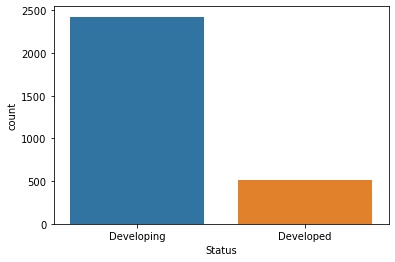

In [13]:
sns.countplot(data = df, x = 'Status')

In [14]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [15]:
polio_df = pd.DataFrame()

for country in df['Country'].unique():
    temp_df = df.loc[(df['Country'] == country)]
    temp_df = temp_df[temp_df['Polio'] == temp_df['Polio'].max()]
    if temp_df['Polio'].max() > 0:
        polio_df = polio_df.append(temp_df)
polio_df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [16]:
polio_df.shape

(596, 22)

In [17]:
polio_df.to_csv('Polio.csv')

In [18]:
polio_df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [19]:
polio_df.drop(['Country','Year','Status','Schooling','Population',
               'GDP','Income_composition_of_resources','Total_expenditure'],
              inplace=True,
             axis =1)

In [20]:
polio_df.corr().abs()

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Diphtheria,HIV/AIDS,thinness__1_19_years,thinness_5_9_years
Life_expectancy,1.000000,0.329705,0.098445,0.286686,0.247684,0.051132,0.009087,0.188165,0.121649,0.442664,0.327917,0.308992,0.144383,0.163109
Adult_Mortality,0.329705,1.000000,0.144816,0.071363,0.199070,0.094085,0.014263,0.346274,0.174439,0.345040,0.281803,0.609795,0.269841,0.302875
infant_deaths,0.098445,0.144816,1.000000,0.097704,0.096827,0.014496,0.615620,0.220936,0.992459,0.175362,0.147035,0.056328,0.297296,0.302879
Alcohol,0.286686,0.071363,0.097704,1.000000,0.301751,0.118420,0.020854,0.177909,0.099069,0.225818,0.207951,0.023377,0.422033,0.394942
percentage_expenditure,0.247684,0.199070,0.096827,0.301751,1.000000,0.063844,0.055438,0.133125,0.098027,0.111030,0.105273,0.060470,0.213485,0.213953
Hepatitis_B,0.051132,0.094085,0.014496,0.118420,0.063844,1.000000,0.022086,0.015367,0.001012,0.321694,0.323000,0.031609,0.129702,0.118548
Measles,0.009087,0.014263,0.615620,0.020854,0.055438,0.022086,1.000000,0.120857,0.572139,0.019910,0.032209,0.021149,0.130651,0.118415
BMI,0.188165,0.346274,0.220936,0.177909,0.133125,0.015367,0.120857,1.000000,0.234856,0.188919,0.138134,0.210101,0.444337,0.442268
under_five_deaths,0.121649,0.174439,0.992459,0.099069,0.098027,0.001012,0.572139,0.234856,1.000000,0.208017,0.175802,0.079391,0.300564,0.309685
Polio,0.442664,0.345040,0.175362,0.225818,0.111030,0.321694,0.019910,0.188919,0.208017,1.000000,0.782767,0.213893,0.142108,0.149668


<AxesSubplot:>

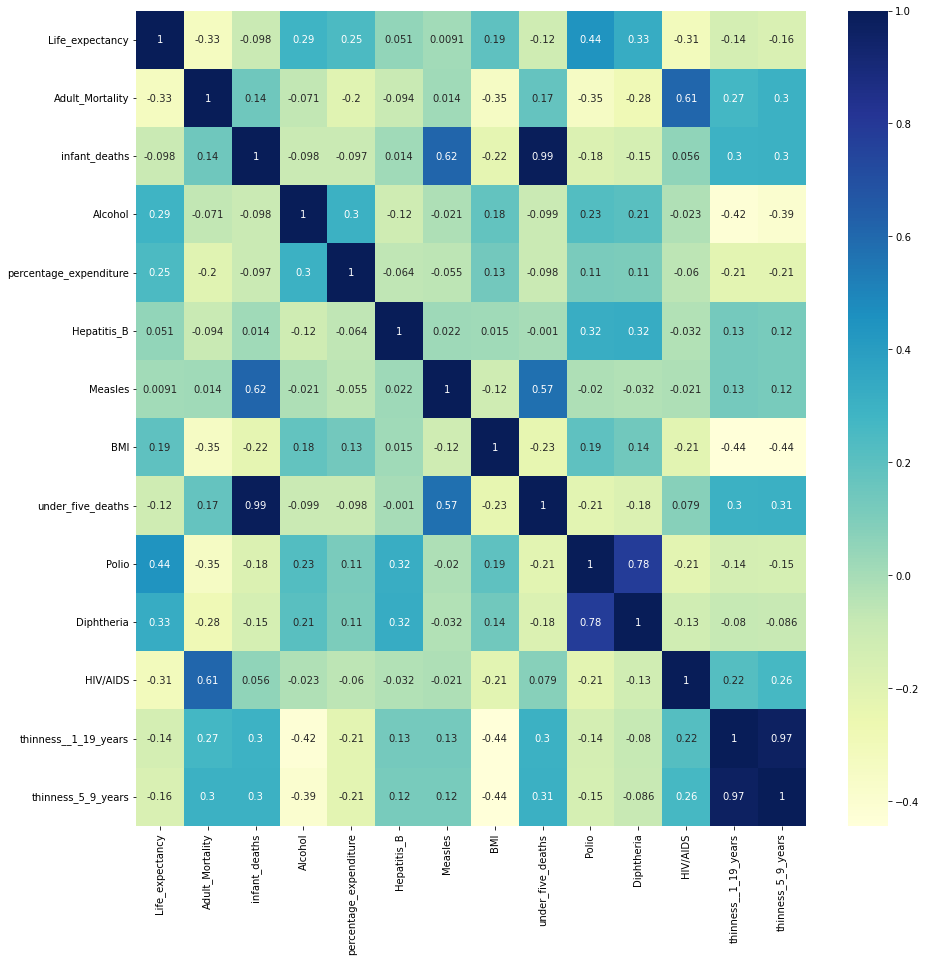

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(polio_df.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='GDP', ylabel='percentage_expenditure'>

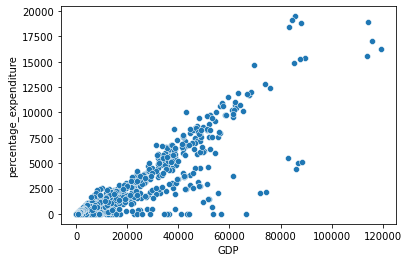

In [22]:
sns.scatterplot(data=df,x='GDP',y = 'percentage_expenditure')

In [23]:

diseases = ['Hepatitis_B','Measles', 'Polio', 'Total_expenditure','Diphtheria',
            'HIV/AIDS', 'thinness__1_19_years','thinness_5_9_years']

max_disease_dict = {'Country' : [],
                   'Year' : [],
                   'Disease': [],
                   'Count' : []}


for country in df['Country'].unique():
    temp_df = df[df['Country'] == country]
    for year in temp_df['Year'].unique():
        temp_df = df.loc[(df['Country'] == country) & (df['Year'] == year)]
        
        disease_name = ''
        count = 0
        
        for disease in diseases:
            if temp_df[disease].values[0] >= count:
                count = temp_df[disease].values[0]
                disease_name = disease
            
        max_disease_dict['Country'].append(country)
        max_disease_dict['Year'].append(year)
        max_disease_dict['Disease'].append(disease_name)
        max_disease_dict['Count'].append(count)  

In [24]:
disease_by_year_df = pd.DataFrame.from_dict(max_disease_dict)
disease_by_year_df.head()

,Country,Year,Disease,Count
0,Afghanistan,2015,Measles,1154.0
1,Afghanistan,2014,Measles,492.0
2,Afghanistan,2013,Measles,430.0
3,Afghanistan,2012,Measles,2787.0
4,Afghanistan,2011,Measles,3013.0


In [25]:
disease_by_year_df.to_csv('disease_by_year.csv')

In [26]:
print('minimum Life expectancy :',df.Life_expectancy.min())
print('maximum Life expectancy :',df.Life_expectancy.max())
print('minimum BMI :',df.BMI.min())
print('maximum BMI :',df.BMI.max())

minimum Life expectancy : 0.0
maximum Life expectancy : 89.0
minimum BMI : 0.0
maximum BMI : 87.3


<AxesSubplot:xlabel='BMI', ylabel='Life_expectancy'>

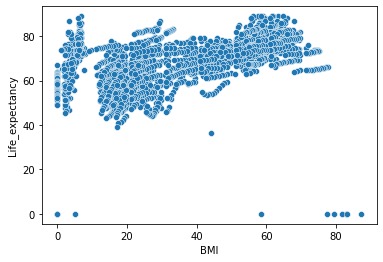

In [27]:
sns.scatterplot(data=df,x=df.BMI,y = df.Life_expectancy)

<AxesSubplot:>

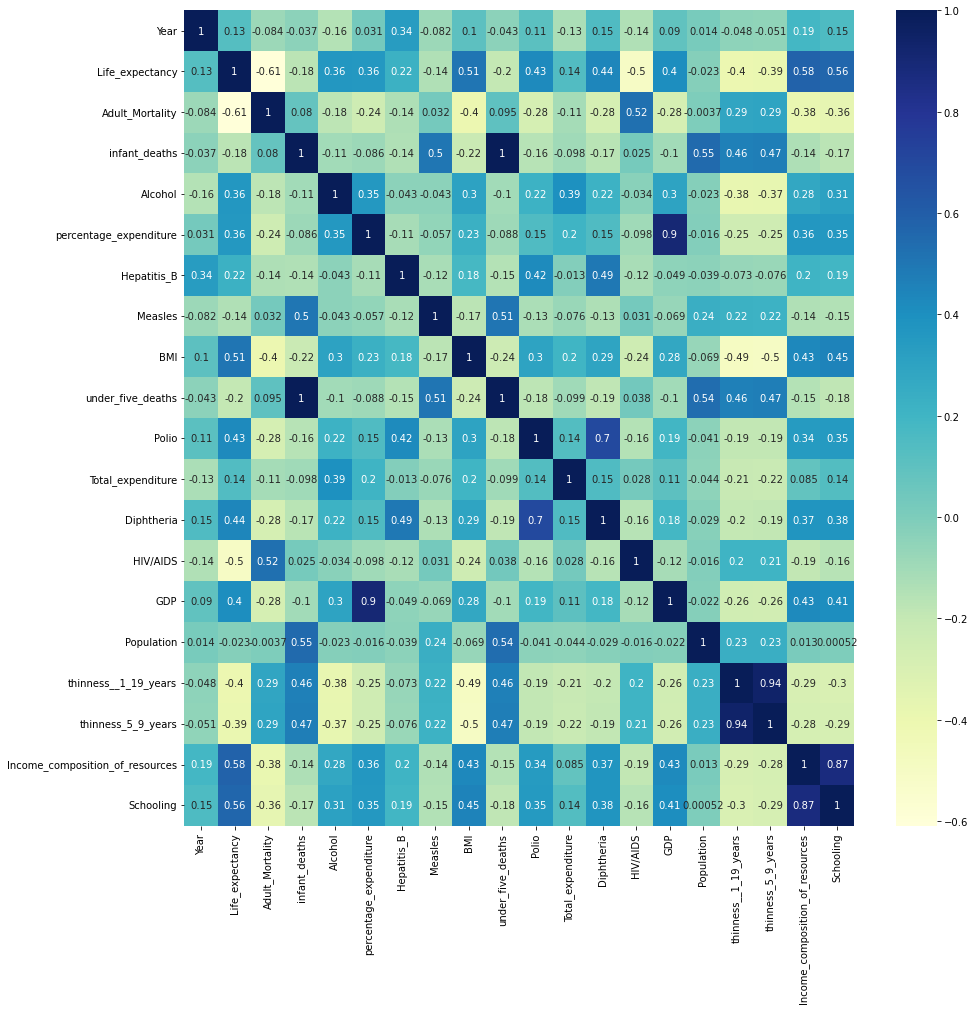

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [29]:
df[df.BMI == 0]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1715,Monaco,2013,Developing,0.0,0.0,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,0.000000,0.0,0.0,0.0,0.000,0.0
2216,San Marino,2013,Developing,0.0,0.0,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,0.000000,0.0,0.0,0.0,0.000,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,0.00,0.000000,31.0,878,...,41.0,0.00,31.0,3.4,758.725782,11882136.0,0.0,0.0,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,0.00,46.074469,0.0,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,0.0,0.0,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,0.00,47.444530,0.0,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,0.0,0.0,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,0.00,38.338232,0.0,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,0.0,0.0,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,0.00,0.000000,0.0,1256,...,66.0,0.00,61.0,3.9,176.971300,1448857.0,0.0,0.0,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,0.00,0.000000,0.0,0,...,0.0,0.00,0.0,4.0,1562.239346,167192.0,0.0,0.0,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,0.00,0.000000,0.0,0,...,0.0,0.00,0.0,4.2,1264.789980,967667.0,0.0,0.0,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,0.00,0.000000,0.0,0,...,0.0,0.00,0.0,4.2,1678.711862,9263136.0,0.0,0.0,0.000,0.0


In [30]:
q_low = df['BMI'].quantile(0.1)
q_high = df['BMI'].quantile(0.99)

print(q_low, q_high)

6.8 72.063


In [31]:
df = df[(df.BMI > q_low) & (df.BMI < q_high) & (df.Life_expectancy > 0)]
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:xlabel='BMI', ylabel='Life_expectancy'>

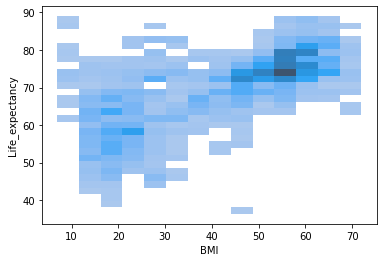

In [32]:
sns.histplot(data=df, x='BMI',y='Life_expectancy')

<AxesSubplot:>

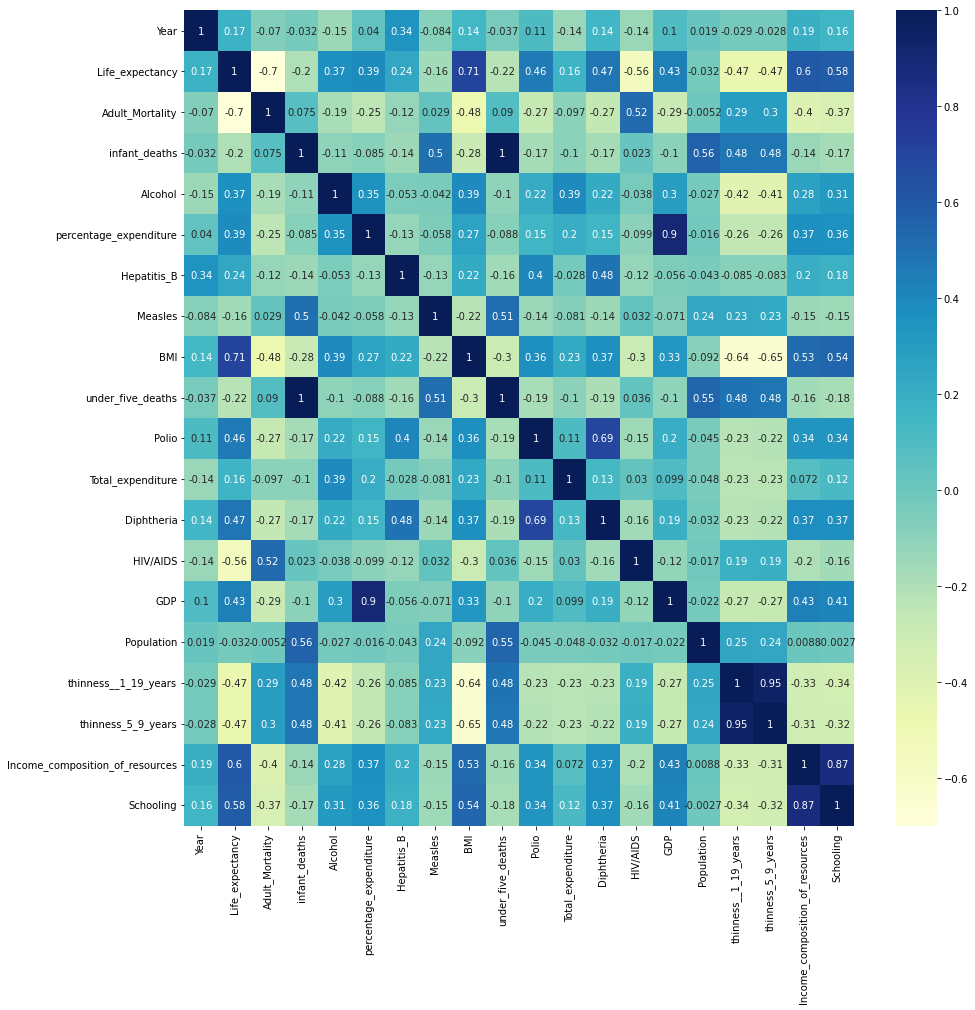

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [34]:
raw_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [35]:
df[['Hepatitis_B','Polio']]

,Hepatitis_B,Polio
0,65.0,6.0
1,62.0,58.0
2,64.0,62.0
3,67.0,67.0
4,68.0,68.0
...,...,...
2933,68.0,67.0
2934,7.0,7.0
2935,73.0,73.0
2936,76.0,76.0


In [36]:
df[df.Hepatitis_B == df.Polio]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,Zambia,2015,Developing,61.8,33.0,27,0.00,0.000000,9.0,9,...,9.0,0.00,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [37]:
df_difference = pd.DataFrame()
df_difference['Hepatitis_B'] = df['Hepatitis_B']
df_difference['Polio'] = df['Polio']
df_difference['difference'] = abs(df['Hepatitis_B'] - df['Polio'])

In [38]:
df_difference[(df_difference['difference'] > 0) & (df_difference['difference'] < 10)]

,Hepatitis_B,Polio,difference
1,62.0,58.0,4.0
2,64.0,62.0,2.0
9,64.0,58.0,6.0
10,66.0,58.0,8.0
24,98.0,99.0,1.0
...,...,...,...
2930,72.0,73.0,1.0
2931,68.0,71.0,3.0
2932,65.0,69.0,4.0
2933,68.0,67.0,1.0


In [39]:
Heppatitis_B = []
for index,row in df.iterrows():
    if int(row['Hepatitis_B']) == 0:
        Heppatitis_B.append(row['Polio'])
    else:
        Heppatitis_B.append(row['Hepatitis_B'])

In [40]:
Heppatitis_B

[65.0,
 62.0,
 64.0,
 67.0,
 68.0,
 66.0,
 63.0,
 64.0,
 63.0,
 64.0,
 66.0,
 67.0,
 65.0,
 64.0,
 63.0,
 62.0,
 99.0,
 98.0,
 99.0,
 99.0,
 99.0,
 99.0,
 98.0,
 99.0,
 98.0,
 98.0,
 99.0,
 97.0,
 96.0,
 96.0,
 96.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 94.0,
 91.0,
 8.0,
 83.0,
 81.0,
 87.0,
 86.0,
 89.0,
 86.0,
 64.0,
 64.0,
 77.0,
 75.0,
 72.0,
 61.0,
 69.0,
 73.0,
 36.0,
 39.0,
 4.0,
 4.0,
 37.0,
 41.0,
 3.0,
 99.0,
 99.0,
 99.0,
 98.0,
 99.0,
 98.0,
 98.0,
 98.0,
 97.0,
 99.0,
 99.0,
 99.0,
 96.0,
 96.0,
 94.0,
 94.0,
 94.0,
 91.0,
 94.0,
 94.0,
 9.0,
 85.0,
 84.0,
 88.0,
 81.0,
 73.0,
 66.0,
 85.0,
 88.0,
 94.0,
 93.0,
 95.0,
 95.0,
 95.0,
 94.0,
 85.0,
 78.0,
 91.0,
 91.0,
 93.0,
 91.0,
 69.0,
 55.0,
 93.0,
 91.0,
 91.0,
 91.0,
 92.0,
 92.0,
 94.0,
 94.0,
 94.0,
 95.0,
 95.0,
 95.0,
 95.0,
 94.0,
 9.0,
 93.0,
 98.0,
 95.0,
 92.0,
 89.0,
 86.0,
 83.0,
 83.0,
 85.0,
 83.0,
 86.0,
 83.0,
 83.0,
 81.0,
 96.0,
 94.0,
 88.0,
 84.0,
 8.0,
 74.0,
 68.0,
 62.0,
 52.0,
 49.0,
 5.0,


In [41]:
df.Hepatitis_B = Heppatitis_B

In [42]:
df[df.Hepatitis_B == 0]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.00,527.307672,0.0,0,...,0.0,8.46,0.0,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,0.0,0,...,0.0,8.45,0.0,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,0.0,0,...,0.0,8.91,0.0,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,0.0,0,...,0.0,8.33,0.0,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,0.0,0,...,0.0,8.23,0.0,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,0.0,0,...,0.0,7.32,0.0,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2615,Timor-Leste,2001,Developing,59.4,269.0,3,0.50,6.556583,0.0,0,...,0.0,3.75,0.0,0.1,56.424987,892531.0,12.1,12.2,0.470,9.8
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,0.0,0,...,0.0,3.26,0.0,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0


<AxesSubplot:>

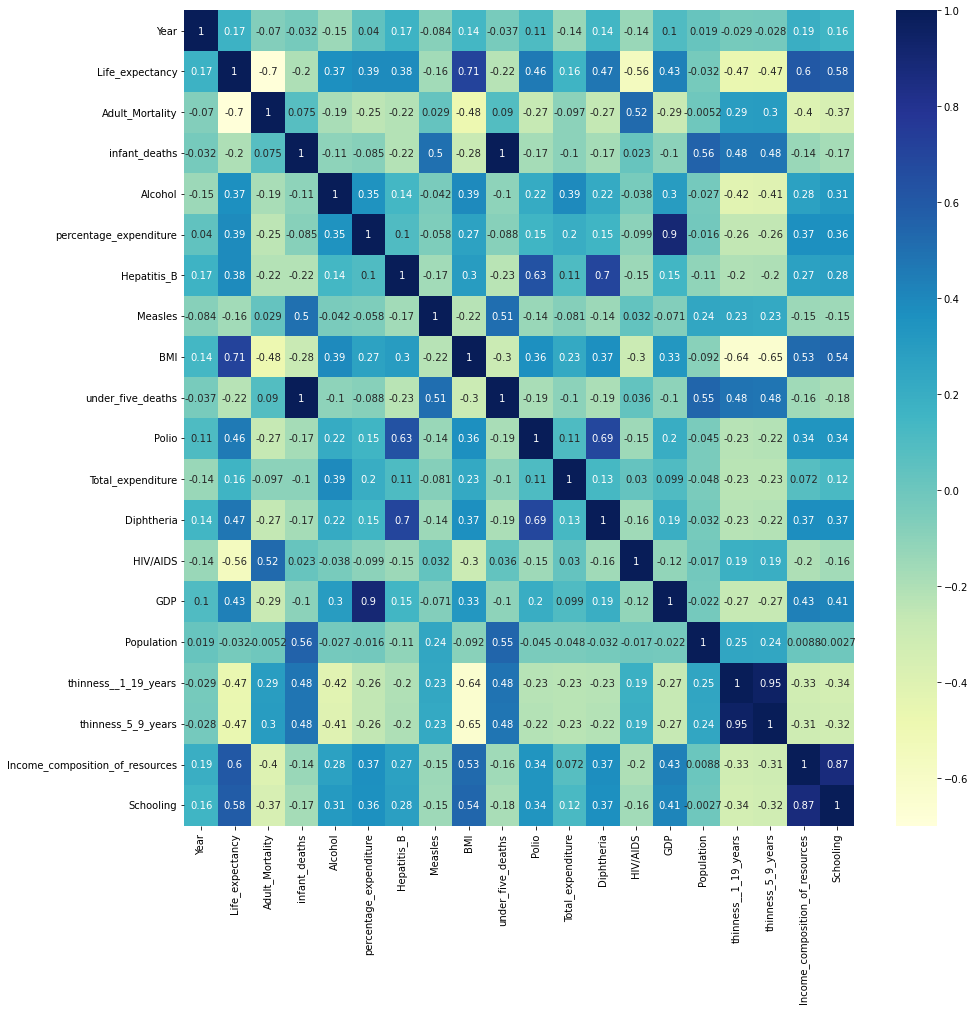

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

-BMI
-Thinness 1-19
-GDP
-Schooling

In [44]:
X = df.drop("Life_expectancy",axis=1)
y = df["Life_expectancy"] 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1827, 21), (784, 21))

<AxesSubplot:>

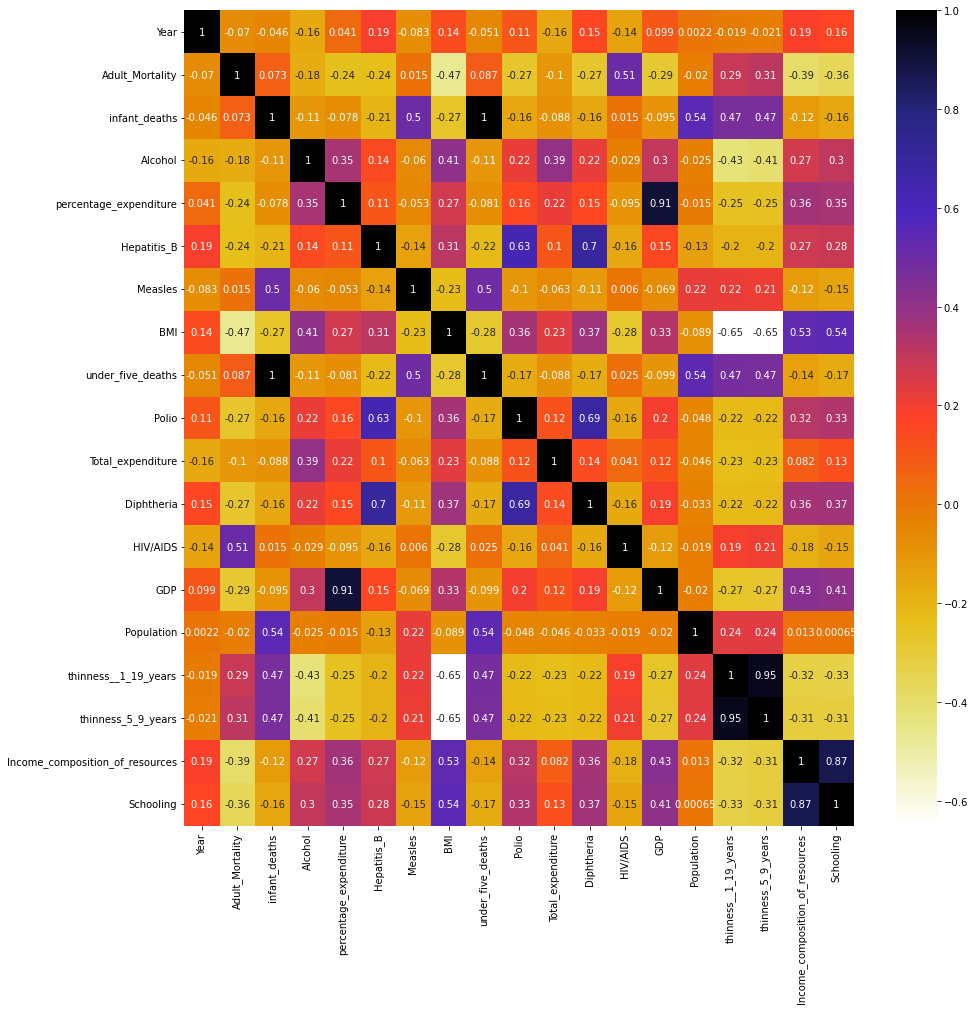

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [54]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

4

In [56]:
corr_features

{'GDP', 'Schooling', 'thinness_5_9_years', 'under_five_deaths'}

In [57]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population,thinness__1_19_years,Income_composition_of_resources
2289,Seychelles,2007,Developing,185.0,0,8.12,916.474177,99.0,1,31.2,99.0,3.30,99.0,0.1,8533.0,5.9,0.733
2724,Uganda,2005,Developing,446.0,99,10.09,44.526140,64.0,22,14.5,59.0,9.36,64.0,8.7,2854394.0,6.5,0.429
210,Barbados,2013,Developing,11.0,0,8.74,263.037284,91.0,0,53.0,91.0,7.57,91.0,0.1,0.0,3.8,0.792
2849,Vanuatu,2008,Developing,153.0,0,1.18,345.339056,61.0,0,47.4,66.0,3.66,67.0,0.1,22534.0,1.5,0.582
1005,Germany,2004,Developed,86.0,3,11.83,5842.374765,88.0,121,57.1,96.0,1.37,96.0,0.1,8251626.0,1.1,0.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,Portugal,2014,Developed,78.0,0,9.88,271.254553,98.0,0,6.9,98.0,9.50,98.0,0.1,14162.0,0.7,0.837
582,Colombia,2009,Developing,15.0,13,4.34,941.646405,92.0,0,53.5,92.0,7.10,92.0,0.1,45416181.0,2.2,0.691
800,Ecuador,2001,Developing,158.0,9,4.13,14.588740,69.0,2,44.3,9.0,3.86,89.0,0.3,12852755.0,1.6,0.670
1607,Maldives,2010,Developing,73.0,0,1.83,91.139718,97.0,0,22.1,97.0,7.93,96.0,0.1,367.0,14.0,0.653
